# How to generate random real numbers with a power-law distribution?

Notes from Appendix D of:<br>
Clauset, A., Shalizi, C. R., & Newman, M. E. J. (2007). Power-law distributions in empirical data. SIAM Review, 51(4), 43. https://doi.org/10.1109/ICPC.2008.18

First, generate set of random real numbers $r$ that are uniformaly distributed in the interval $[0, 1)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil

In [2]:
r = np.random.uniform(low=0.0, high=1.0, size=1000)

Let's plot to see if they're uniformly distributed.

In [3]:
NumBins = 10
MyBins = np.linspace(0, 1, NumBins+1)

r_hist, r_bins = np.histogram(r, bins=MyBins, density=True)

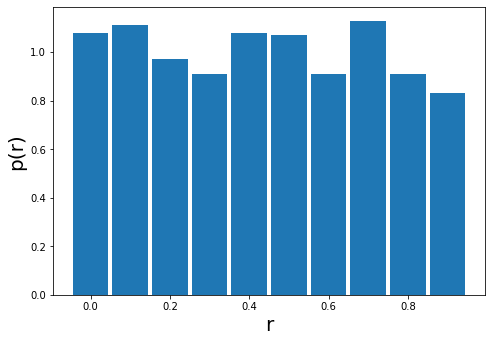

In [4]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar( r_bins[:-1], r_hist, width=0.9*(MyBins[1] - MyBins[0]) )

ax.set_xlabel("r", fontsize=20)
ax.set_ylabel("p(r)", fontsize=20)

plt.show()

Let $p(r)$ be the uniform probability density function, from which we have drawn the above random real numbers.

Now, suppose $p(x)$ is a continuous probability density from which we want to draw
random real numbers $x \geq x_{min}$.

Probability densities $p(r)$ and $p(x)$ are related as follows:

$$p(x)dx = p(r)dr$$

Note that $p(r) = 1$ for $r \in [0, 1)$.

$$\Rightarrow p(x) = \frac{dr}{dx}$$

Integrate both sides wrt $x$:

$$\Rightarrow \int_{x}^{\infty} p(x') dx' = \int_{r}^{1} dr'$$
$$\Rightarrow P(x) = 1 - r$$
$$\Rightarrow x = P^{-1}(1 - r)$$

Where, $P$ is the CDF, and $P^{-1}$ is the functional inverse of the CDF.

Recall that for power-law distribution, PDF is:<br>
$$p(x) = \frac{\alpha - 1}{x_{min}} \left(\frac{x}{x_{min}}\right)^{-\alpha}$$

So, CDF is:
$$P(x) = \int_{x}^{\infty} p(x')dx'
= \int_{x}^{\infty} \frac{\alpha - 1}{x_{min}} \left(\frac{x'}{x_{min}}\right)^{-\alpha} dx'
= \left(\frac{x}{x_{min}}\right)^{-\alpha+1}$$

So:
$$ P(x) = 1 - r $$
$$ \Rightarrow \left( \frac{x}{x_{min}}\right)^{-\alpha+1}
= 1 - r $$
$$ \Rightarrow x = x_{min} (1 - r)^{1/(-\alpha+1)}$$

Let $x_{min} = 7$, $\alpha = 2.5$

In [5]:
xmin = 7.
alpha = 2.5

In [6]:
x = xmin * ((1-r)**(1/(-alpha+1)))

In [7]:
print(min(x), max(x))

7.000574541399359 2987.649692743292


In [8]:
print(floor(min(x)), ceil(max(x)))

7 2988


In [9]:
MyBins_x = np.arange(floor(min(x)), ceil(max(x))+1, 1)

x_hist, x_bins = np.histogram(x, bins=MyBins_x, density=True)

In [10]:
px_theory = (alpha-1)/(xmin) * (x_bins[:-1]/xmin)**(-alpha)

In [11]:
PlotYlim_bottom = (sorted(set(x_hist))[1] - sorted(set(x_hist))[0])/2

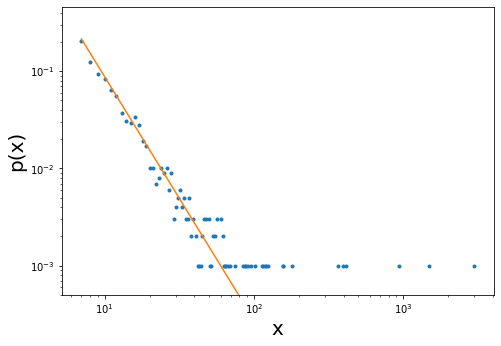

In [12]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot( x_bins[:-1], x_hist, ".")
ax.plot( x_bins[:-1], px_theory, "-")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("p(x)", fontsize=20)

ax.set_ylim(bottom = PlotYlim_bottom)

plt.show()